In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import gmaps
from pandas import DataFrame
from scipy.stats import linregress
# The statistical module used to run chi square test
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
file_to_load = "Resources/database.csv"

# Read File and store into Pandas data frame
bs_df = pd.read_csv(file_to_load,low_memory=False)
bs_df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


In [4]:
bs_df=bs_df.loc[
                (bs_df['Airport']!='UNKNOWN')|
                (bs_df['Operator']!='UNKNOWN')
                ]

cbs_df=bs_df[["Incident Year","Incident Month","Operator","Airport","State","FAA Region","Flight Phase",
              "Visibility","Precipitation","Species Name","Species Quantity","Fatalities","Injuries"]]
cbs_df=cbs_df.loc[(cbs_df['Species Name']!="WHITE-TAILED DEER") &
                  (cbs_df['Species Name']!="MULE DEER")
                 ]

# Keep records with only valid US FAA Regions
cbs_df=cbs_df.loc[
                (cbs_df['FAA Region']=='ASO')|
                (cbs_df['FAA Region']=='AEA')|
                (cbs_df['FAA Region']=='AGL')|
                (cbs_df['FAA Region']=='ASW')|
                (cbs_df['FAA Region']=='AWP')|
                (cbs_df['FAA Region']=='ANM')|
                (cbs_df['FAA Region']=='ACE')|
                (cbs_df['FAA Region']=='ANE')|
                (cbs_df['FAA Region']=='AAL')
                ]
cbs_df=cbs_df.copy()
cbs_df['Visibility']=cbs_df['Visibility'].fillna('NONE')
cbs_df['Precipitation']=cbs_df['Precipitation'].fillna('NONE')
cbs_df['Fatalities']=cbs_df['Fatalities'].fillna(0)
cbs_df['Injuries']=cbs_df['Injuries'].fillna(0)
print(f"Record number: {len(cbs_df)}")
cbs_df.head()

Record number: 150640


,Incident Year,Incident Month,Operator,Airport,State,FAA Region,Flight Phase,Visibility,Precipitation,Species Name,Species Quantity,Fatalities,Injuries
0,1990,1,DELTA AIR LINES,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,CLIMB,NONE,NONE,GULL,1,0.0,0.0
1,1990,1,HAWAIIAN AIR,LIHUE ARPT,HI,AWP,TAKEOFF RUN,NONE,NONE,HOUSE SPARROW,1,0.0,0.0
2,1990,1,UNKNOWN,LIHUE ARPT,HI,AWP,NaN,NONE,NONE,BARN OWL,1,0.0,0.0
3,1990,1,MILITARY,MYRTLE BEACH INTL,SC,ASO,APPROACH,DAY,NONE,UNKNOWN MEDIUM BIRD,1,0.0,0.0
4,1990,1,MILITARY,JACKSONVILLE INTL,FL,ASO,CLIMB,DAY,NONE,FINCH,1,0.0,0.0


In [19]:
cbs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [20]:
##  Birds strikes due to Visibility and Precipitation.

In [5]:
# get the unique values in Visibility
cbs_df["Visibility"].unique()

array(['NONE', 'DAY', 'DUSK', 'NIGHT', 'DAWN', 'UNKNOWN'], dtype=object)

In [6]:
# get the total number of unique values in Visibility
cbs_df["Visibility"].value_counts()

DAY        64133
NONE       49723
NIGHT      28856
DUSK        4623
DAWN        3279
UNKNOWN       26
Name: Visibility, dtype: int64

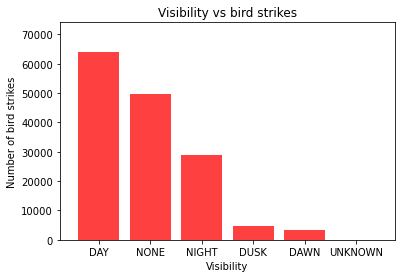

In [7]:
# DATA SET 1 for bird strikes due to Visibility
Visibility = ['DAY','NONE','NIGHT', 'DUSK', 'DAWN', 'UNKNOWN']
bird_strikes = cbs_df["Visibility"].value_counts()

x_axis = np.arange(0, len(Visibility))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Visibility vs bird strikes")
plt.xlabel("Visibility")
plt.ylabel("Number of bird strikes")

plt.xlim(-0.75, len(Visibility)-.25)
plt.ylim(0, max(bird_strikes) + 10000)

plt.bar(x_axis, bird_strikes, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Visibility)
plt.show()

## Based on this bar chart. we can see most of the bird strikes happening under the "Day" and "NONE" weather condition.So I think Visibility
## will not be the strongest evidence that will result the bird strikes happening.However,there are many bird strikes happening
## at night so Visibility could be one of the factors that result bird strikes happening.

In [8]:
# get the unique values in Precipitation
cbs_df["Precipitation"].unique()

array(['NONE', 'FOG', 'RAIN', 'SNOW', 'FOG, RAIN', 'FOG, SNOW',
       'RAIN, SNOW', 'FOG, RAIN, SNOW'], dtype=object)

In [9]:
# get the total number of unique values in Precipitation
cbs_df["Precipitation"].value_counts()
# None = Clear weather

NONE               143245
RAIN                 4971
FOG                  1867
SNOW                  287
FOG, RAIN             235
RAIN, SNOW             18
FOG, SNOW              12
FOG, RAIN, SNOW         5
Name: Precipitation, dtype: int64

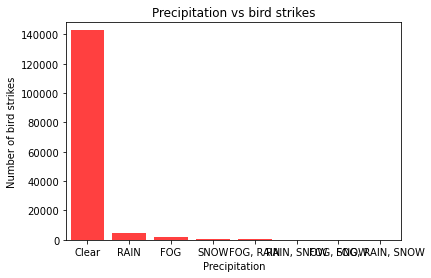

In [10]:
# DATA SET 1 for bird strikes due to Precipitation
# None = Clear weather
Precipitation = ['Clear', 'RAIN', 'FOG', 'SNOW', 'FOG, RAIN', 'RAIN, SNOW',
       'FOG, SNOW', 'FOG, RAIN, SNOW']
bird_strikes1 = cbs_df["Precipitation"].value_counts()

x_axis = np.arange(0, len(Precipitation))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Precipitation vs bird strikes")
plt.xlabel("Precipitation")
plt.ylabel("Number of bird strikes")

plt.xlim(-0.5, len(Precipitation)-0.5)
plt.ylim(0, max(bird_strikes1) + 5000)

plt.bar(x_axis, bird_strikes1, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Precipitation)
plt.show()

## Based on this bar chart. we can see most of the bird strikes happening under the "clear" weather condition.So I think Precipitation
## probably will not be the main factors that result bird strikes happening.

In [11]:
# get the unique values in Injuries
cbs_df["Injuries"].unique()

array([  0.,   2.,   1.,   5., 100.,   7.])

In [12]:
# get the total number of unique values in Injuries
cbs_df["Injuries"].value_counts()

0.0      150546
1.0          74
2.0          17
7.0           1
5.0           1
100.0         1
Name: Injuries, dtype: int64

In [13]:
# get the unique values in Fatalities
cbs_df["Fatalities"].unique()

array([0., 1., 5.])

In [14]:
# get the total number of unique values in Fatalities
cbs_df["Fatalities"].value_counts()

0.0    150638
1.0         1
5.0         1
Name: Fatalities, dtype: int64

In [19]:
#(Precipitation = None)
cbs_df["Precipitation"].value_counts()
# None=Clear weather=143245

In [20]:
#(Visibility = dawn+day)
# get the total number of unique values in Visibility

cbs_df["Visibility"].value_counts()
## dawn+day= 64133+3279= 67412

In [22]:
# Hypothesis 1: More injuries+fatalities happen in fair weather (Precipitation = None)
# Hypothesis 2: More injuries+fatalities happen during the day (Visibility = dawn+day)

A=143245 #(Precipitation = None)
AA=4971+1867+287+235+18+12+5  #=7395#Precipitation /= None

B=67412 #(Visibility = dawn+day)
BB=49723+28856+4623+26  #= 83228 #(Visibility /= dawn+day)

# DATA SET1
Precipitation1 = ["Clear", "Not Clear"] ## Not clear =FOG, RAIN, SNOW 
members = [A,AA]
colors = ["yellowgreen", "red"]
explode = (0, 0.1)


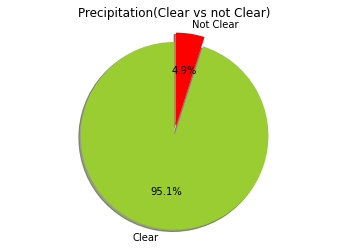

In [23]:
plt.title("Precipitation(Clear vs not Clear)")
plt.pie(members, explode=explode, labels=Precipitation1, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [24]:
# DATA SET2
gyms = ["dawn and day", "not (dawn and day)"]
members = [B,BB]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.1)


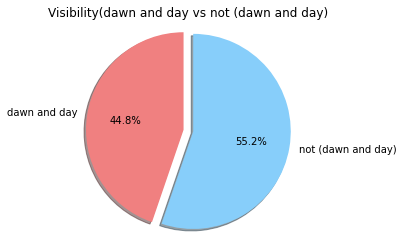

In [25]:
plt.title("Visibility(dawn and day vs not (dawn and day)")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

We want to run the chi square test for wherher the probabilities of the birds strikes happen in all different "Visibility" conditions are evenly distributed.

In [29]:
# get the total number of unique values in Visibility
cbs_df["Visibility"].value_counts()

DAY        64133
NONE       49723
NIGHT      28856
DUSK        4623
DAWN        3279
UNKNOWN       26
Name: Visibility, dtype: int64

In [30]:
# Observed data in Visibility, there are total of 6 different conditions. 
observed = pd.Series([64133, 49723, 28856, 4623, 3279, 26], index=["1", "2", "3", "4","5","6"])

# Create a data frame
df = pd.DataFrame([observed]).T

# total observations = 150640
# Add a column whose default values are the expected values
df[1] = 25106

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
1,64133,25106
2,49723,25106
3,28856,25106
4,4623,25106
5,3279,25106
6,26,25106


In [31]:
# With six rows, the degree of freedom is 6-1 = 5
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 5)

In [32]:
# The critical value
critical_value

11.070497693516351

In [33]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=146106.25093603123, pvalue=0.0)

Conclusion:
Since the chi-square value of 146106.25 at a confidence level of 95% exceeds the critical value of 11.07, we conclude that the numbers of the birds strikes happen in all different "Visibility" conditions are (not evenly distributed) statistically significant.

Comparison of "Precipitation" and the sum of bird strikes happening in those "Precipitation" conditions.

In [34]:
# get the total number of unique values in Precipitation
cbs_df["Precipitation"].value_counts()
# None = Clear weather

NONE               143245
RAIN                 4971
FOG                  1867
SNOW                  287
FOG, RAIN             235
RAIN, SNOW             18
FOG, SNOW              12
FOG, RAIN, SNOW         5
Name: Precipitation, dtype: int64

In [ ]:
# Create dataset
#X=["NONE","RAIN","FOG","SNOW","FOG, RAIN ","RAIN, SNOW","FOG, SNOW","FOG, RAIN, SNOW"]
#Y=[143245,4971,1867,287,235,18,12,5]

In [36]:
Pre = pd.DataFrame({
    "Precipitation": ["NONE","RAIN","FOG","SNOW","FOG, RAIN ","RAIN, SNOW","FOG, SNOW","FOG, RAIN, SNOW"],
    "counts": [143245,4971,1867,287,235,18,12,5],
})
Pre

,Precipitation,counts
0,NONE,143245
1,RAIN,4971
2,FOG,1867
3,SNOW,287
4,"FOG, RAIN",235
5,"RAIN, SNOW",18
6,"FOG, SNOW",12
7,"FOG, RAIN, SNOW",5


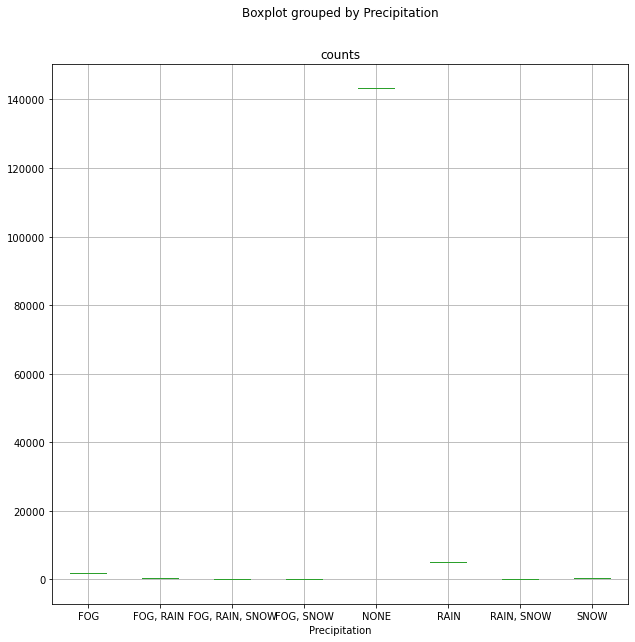

In [41]:
# Create a boxplot to compare means
Pre.boxplot("counts", by="Precipitation", figsize=(10, 10))

In [43]:
# Extract individual groups
group1 = Pre[Pre["Precipitation"] == "NONE"]["counts"]
group2 = Pre[Pre["Precipitation"] == "RAIN"]["counts"]
group3 = Pre[Pre["Precipitation"] == "FOG"]["counts"]
group4 = Pre[Pre["Precipitation"] == "SNOW"]["counts"]
group5 = Pre[Pre["Precipitation"] == "FOG, RAIN"]["counts"]
group6 = Pre[Pre["Precipitation"] == "RAIN, SNOW"]["counts"]
group7 = Pre[Pre["Precipitation"] == "FOG, SNOW"]["counts"]
group8 = Pre[Pre["Precipitation"] == "FOG, RAIN, SNOW"]["counts"]

In [44]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=nan, pvalue=nan)